<a href="https://colab.research.google.com/github/xDEVELYNNx/PFA_VF/blob/main/Hand_Gesture_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libs 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer

#mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#load data

In [ ]:
data_test=pd.read_csv("/content/drive/MyDrive/pfa/data_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/pfa/data_train.csv")

#show data

In [ ]:
data_test.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_860,pixel_861,pixel_862,pixel_863,pixel_864,pixel_865,pixel_866,pixel_867,pixel_868,pixel_869,pixel_870,pixel_871,pixel_872,pixel_873,pixel_874,pixel_875,pixel_876,pixel_877,pixel_878,pixel_879,pixel_880,pixel_881,pixel_882,pixel_883,pixel_884,pixel_885,pixel_886,pixel_887,pixel_888,pixel_889,pixel_890,pixel_891,pixel_892,pixel_893,pixel_894,pixel_895,pixel_896,pixel_897,pixel_898,pixel_899
0,backward,49,53,48,47,54,42,54,52,51,43,50,46,46,43,44,45,41,43,40,42,37,33,31,39,35,32,29,28,33,28,52,49,57,53,52,51,52,49,56,...,14,16,17,13,13,17,11,14,14,8,17,13,17,22,26,27,28,25,27,30,75,153,153,143,123,63,28,17,21,18,15,12,19,16,15,12,14,10,11,11
1,forward,152,157,126,121,68,161,76,151,158,128,102,132,118,124,101,163,164,133,141,140,163,166,120,98,151,162,143,86,127,88,152,154,160,85,116,147,156,101,114,...,116,141,137,165,163,72,106,103,74,33,141,80,179,177,179,118,126,74,88,99,104,115,99,86,77,63,67,82,90,119,63,69,136,134,159,145,40,50,52,45
2,stop,196,194,193,192,186,181,180,179,174,173,169,167,166,166,165,164,157,158,159,155,156,156,154,152,154,153,154,151,152,154,198,194,194,191,188,184,181,176,176,...,117,115,113,116,116,119,118,143,122,158,179,178,176,174,172,168,165,162,155,148,104,113,107,104,85,70,70,116,115,116,115,116,116,116,115,116,116,140,123,159
3,backward,91,88,89,92,87,79,82,81,82,80,79,79,80,81,82,82,80,82,85,86,87,88,90,93,95,95,97,100,99,101,90,87,90,93,92,87,89,86,83,...,155,155,159,161,162,164,164,163,160,159,201,207,200,128,137,140,212,213,211,212,141,75,91,104,116,113,105,141,142,160,159,158,161,159,164,164,162,160,158,157
4,left,158,156,152,155,157,156,155,153,148,154,150,148,148,148,144,143,146,142,138,139,142,140,135,138,137,141,137,141,147,141,158,159,154,155,158,151,154,151,153,...,41,44,45,47,51,48,54,173,196,195,243,250,230,227,228,226,223,216,221,224,219,222,213,212,213,215,215,186,42,42,42,44,40,41,45,48,50,76,203,195


#extract labels

In [ ]:
y_train=data_train['label']
y_test=data_test['label']
del data_train['label']
del data_test['label']

#label binarize

In [ ]:
label_binarizer=LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = data_train.values
x_test = data_test.values

#normalization

In [ ]:
x_train = x_train/255
x_test = x_test/255

#reshape


In [ ]:
x_train = x_train.reshape(-1,30,30,1)
x_test = x_test.reshape(-1,30,30,1)

#build model 

In [ ]:
model=Sequential()
model.add(Conv2D(75,(3,3), strides=1,padding='same',activation='relu',input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2,padding='same'))
model.add(Conv2D(50,(3,3), strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2,padding='same'))
model.add(Conv2D(25,(3,3), strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5,activation='softmax'))

ValueError: ignored

#compile model 

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#set learning rate

In [ ]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

#train model 

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/50
29/29 [==============================] - 4s 33ms/step - loss: 1.3398 - accuracy: 0.5412 - val_loss: 1.6604 - val_accuracy: 0.2341
Epoch 2/50
29/29 [==============================] - 0s 12ms/step - loss: 0.1379 - accuracy: 0.9541 - val_loss: 1.9018 - val_accuracy: 0.1951
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.9940 - val_loss: 2.1719 - val_accuracy: 0.2000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/50
29/29 [==============================] - 0s 12ms/step - loss: 0.0131 - accuracy: 0.9999 - val_loss: 2.4446 - val_accuracy: 0.1951
Epoch 5/50
29/29 [==============================] - 0s 12ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 2.6744 - val_accuracy: 0.2049

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/50
29/29 [==============================] - 0s 12ms/step - loss: 0.0067 - accuracy: 0.9997 - val_loss: 2.8853 - val_accuracy:

#check final accuracy 

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 1.0000


[0.0032505334820598364, 1.0]

#see predictions

In [ ]:
predictions= model.predict_classes(x_test)
for i in range(len(predictions)):
  if( predictions[i]>=9 or predictions[i]>=25):
    predictions[i]+=1
predictions[:10]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 4, 0, 2, 0, 4, 1, 1, 2])

# save model


In [ ]:
model.save('HGR_CNN.h5')

#show images with predictions

In [ ]:
def show_img(img,df):
  pixels=data_test.iloc[img,0:]
  pixels=np.array(pixels,dtype='uint8')
  pixels=pixels.reshape((30,30))
  plt.title('Image')
  plt.imshow(pixels,cmap='gray')
  plt.show()

0 = backward -
1 = forward -
2 = left -
3 = right -
4 = stop 

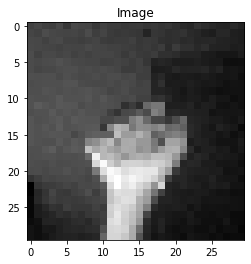


valeur de predictions :  0 


***********************************



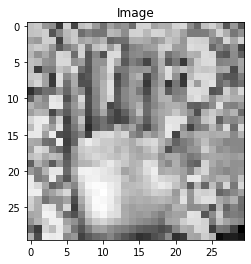


valeur de predictions :  1 


***********************************



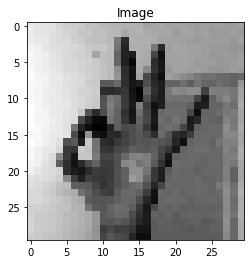


valeur de predictions :  4 


***********************************



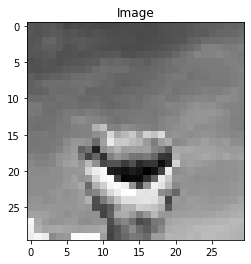


valeur de predictions :  0 


***********************************



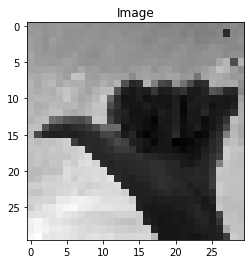


valeur de predictions :  2 


***********************************



In [ ]:
for i in [0, 1, 2, 3, 4]:
  show_img(i,data_test)
  print("\nvaleur de predictions : ",predictions[i],"\n")
  print("\n***********************************\n")